In [45]:
import numpy as np
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

digits = datasets.load_digits()

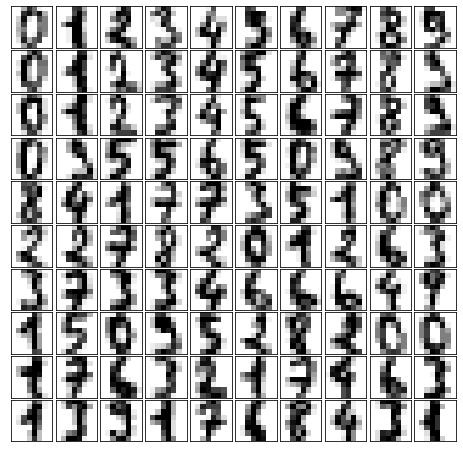

In [46]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

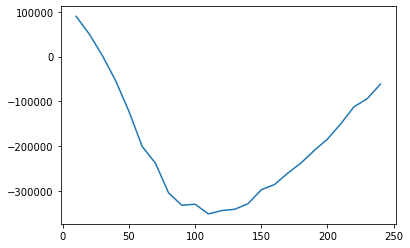

In [47]:
data = digits.data
components = np.arange(10, 250, 10)
models = [GaussianMixture(n) for n in components]
aic = [model.fit(data).aic(data) for model in models]
plt.plot(components, aic);

In [48]:
best_componant = 1
best_aic = float('inf')
for i in range(len(aic)):
    if aic[i]<best_aic:
        best_aic = aic[i]
        best_componant = i*10+10
        
print('best number of componant = ',best_componant)


best number of componant =  110


In [49]:
gmm = GaussianMixture(best_componant)
gmm.fit(data)
print(gmm.converged_)

True


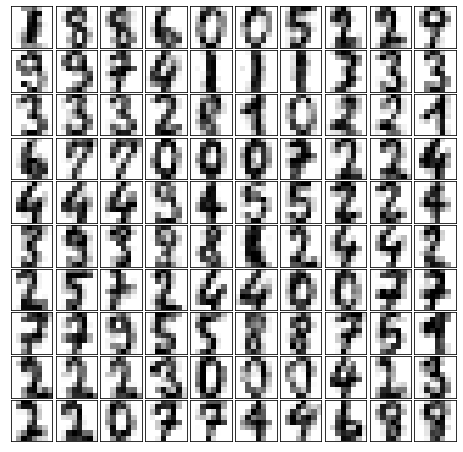

In [59]:
sample = gmm.sample(100)
plot_digits(sample[0].reshape(100, 64))

In [60]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

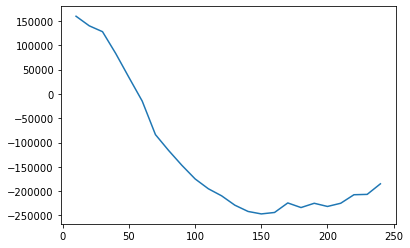

In [61]:
components = np.arange(10, 250, 10)
models = [GaussianMixture(n) for n in components]
aic = [model.fit(data).aic(data) for model in models]
plt.plot(components, aic);

In [62]:
best_componant = 1
best_aic = float('inf')
for i in range(len(aic)):
    if aic[i]<best_aic:
        best_aic = aic[i]
        best_componant = i*10+10
        
print('best number of componant = ',best_componant)


best number of componant =  150


In [63]:
gmm = GaussianMixture(best_componant, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [67]:
data_new = gmm.sample(100)


In [71]:
digits_new = pca.inverse_transform(data_new[0])


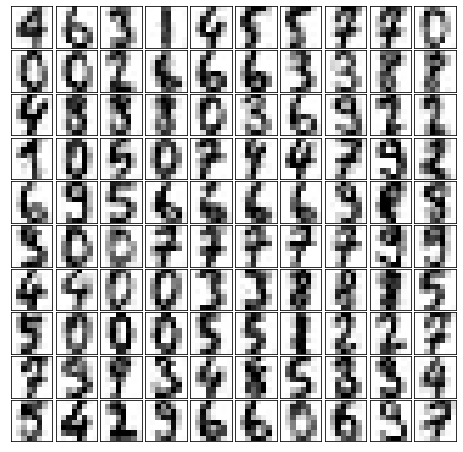

In [72]:
plot_digits(digits_new)